In [8]:


pip install pandas openpyxl xlrd


   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.5 kB 660.6 kB/s eta 0:00:01
   ------------ --------------------------- 30.7/96.5 kB 660.6 kB/s eta 0:00:01
   ------------------------- -------------- 61.4/96.5 kB 550.5 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 553.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\vinay\appdata\local\programs\python\python311\lib\site-packages\diamondpriceprediction-0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('historical_data.xls')

In [3]:
df

,"ï»¿""Date""",Price,Open,High,Low,Vol.,Change %
0,06/09/2019,11.02,11.00,11.07,10.91,85.50K,0.46%
1,05/09/2019,10.97,11.04,11.14,10.86,95.74K,-0.36%
2,04/09/2019,11.01,11.16,11.27,11.00,107.62K,-1.61%
3,03/09/2019,11.19,11.20,11.40,11.08,106.35K,0.45%
4,30/08/2019,11.14,11.20,11.30,11.05,58.74K,-0.62%
...,...,...,...,...,...,...,...
4995,07/01/2000,5.84,5.81,5.88,5.69,12.08K,1.21%
4996,06/01/2000,5.77,5.90,5.94,5.76,10.48K,-0.69%
4997,05/01/2000,5.81,5.73,5.90,5.73,9.78K,0.69%
4998,04/01/2000,5.77,6.08,6.11,5.76,24.47K,-5.41%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ï»¿"Date"  5000 non-null   object 
 1   Price      5000 non-null   float64
 2   Open       5000 non-null   float64
 3   High       5000 non-null   float64
 4   Low        5000 non-null   float64
 5   Vol.       4921 non-null   object 
 6   Change %   5000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.6+ KB


In [5]:
df.head()

,"ï»¿""Date""",Price,Open,High,Low,Vol.,Change %
0,06/09/2019,11.02,11.00,11.07,10.91,85.50K,0.46%
1,05/09/2019,10.97,11.04,11.14,10.86,95.74K,-0.36%
2,04/09/2019,11.01,11.16,11.27,11.00,107.62K,-1.61%
3,03/09/2019,11.19,11.20,11.40,11.08,106.35K,0.45%
4,30/08/2019,11.14,11.20,11.30,11.05,58.74K,-0.62%


In [29]:
df.rename(columns={'ï»¿"Date"': 'Date'}, inplace=True)


In [7]:
df.columns 

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [30]:

print(df.isnull().sum())


Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Day         0
Month       0
Year        0
dtype: int64


In [31]:
df.dropna(subset=['Vol.'], inplace = True)

In [10]:
print(df.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4921 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     4921 non-null   float64
 1   Open      4921 non-null   float64
 2   High      4921 non-null   float64
 3   Low       4921 non-null   float64
 4   Vol.      4921 non-null   float64
 5   Change %  4921 non-null   float64
 6   Day       4921 non-null   int32  
 7   Month     4921 non-null   int32  
 8   Year      4921 non-null   int32  
dtypes: float64(6), int32(3)
memory usage: 326.8 KB


In [12]:
df['Vol.']

0        85.50K
1        95.74K
2       107.62K
3       106.35K
4        58.74K
         ...   
4995     12.08K
4996     10.48K
4997      9.78K
4998     24.47K
4999      7.99K
Name: Vol., Length: 4921, dtype: object

In [13]:
df.shape

(4921, 7)

In [14]:

df['Vol.'] = df['Vol.'].replace({'K': ''}, regex=True).astype(float) * 1000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4921 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4921 non-null   object 
 1   Price     4921 non-null   float64
 2   Open      4921 non-null   float64
 3   High      4921 non-null   float64
 4   Low       4921 non-null   float64
 5   Vol.      4921 non-null   float64
 6   Change %  4921 non-null   object 
dtypes: float64(5), object(2)
memory usage: 307.6+ KB


In [16]:
df['Change %']

0        0.46%
1       -0.36%
2       -1.61%
3        0.45%
4       -0.62%
         ...  
4995     1.21%
4996    -0.69%
4997     0.69%
4998    -5.41%
4999    -0.33%
Name: Change %, Length: 4921, dtype: object

In [17]:
df['Change %'] = df['Change %'].replace({'%': ''}, regex=True).astype(float)

In [18]:
df.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,06/09/2019,11.02,11.00,11.07,10.91,85500.0,0.46
1,05/09/2019,10.97,11.04,11.14,10.86,95740.0,-0.36
2,04/09/2019,11.01,11.16,11.27,11.00,107620.0,-1.61
3,03/09/2019,11.19,11.20,11.40,11.08,106350.0,0.45
4,30/08/2019,11.14,11.20,11.30,11.05,58740.0,-0.62


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4921 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4921 non-null   object 
 1   Price     4921 non-null   float64
 2   Open      4921 non-null   float64
 3   High      4921 non-null   float64
 4   Low       4921 non-null   float64
 5   Vol.      4921 non-null   float64
 6   Change %  4921 non-null   float64
dtypes: float64(6), object(1)
memory usage: 307.6+ KB


In [20]:
df['Date'].head(10)

0    06/09/2019
1    05/09/2019
2    04/09/2019
3    03/09/2019
4    30/08/2019
5    29/08/2019
6    28/08/2019
7    27/08/2019
8    26/08/2019
9    23/08/2019
Name: Date, dtype: object

In [21]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [22]:

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4921 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4921 non-null   datetime64[ns]
 1   Price     4921 non-null   float64       
 2   Open      4921 non-null   float64       
 3   High      4921 non-null   float64       
 4   Low       4921 non-null   float64       
 5   Vol.      4921 non-null   float64       
 6   Change %  4921 non-null   float64       
 7   Day       4921 non-null   int32         
 8   Month     4921 non-null   int32         
 9   Year      4921 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(3)
memory usage: 365.2 KB


In [24]:
df.drop('Date', axis=1, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4921 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     4921 non-null   float64
 1   Open      4921 non-null   float64
 2   High      4921 non-null   float64
 3   Low       4921 non-null   float64
 4   Vol.      4921 non-null   float64
 5   Change %  4921 non-null   float64
 6   Day       4921 non-null   int32  
 7   Month     4921 non-null   int32  
 8   Year      4921 non-null   int32  
dtypes: float64(6), int32(3)
memory usage: 326.8 KB


In [60]:
df.describe()

,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
count,4921.000000,4921.000000,4921.00000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000,4921.000000
mean,13.955300,13.958360,14.16314,13.758319,39619.146515,0.037096,15.691729,6.462508,2009.383865
std,6.032747,6.044957,6.14905,5.919850,25313.525182,2.179320,8.744515,3.405499,5.678190
min,4.700000,4.820000,4.88000,4.680000,0.000000,-12.690000,1.000000,1.000000,2000.000000
25%,9.220000,9.210000,9.31000,9.100000,18930.000000,-1.160000,8.000000,4.000000,2004.000000
50%,12.750000,12.780000,12.92000,12.610000,36400.000000,0.000000,16.000000,6.000000,2009.000000
75%,17.300000,17.310000,17.55000,17.070000,55160.000000,1.190000,23.000000,9.000000,2014.000000
max,35.310000,35.400000,36.08000,34.010000,205670.000000,26.550000,31.000000,12.000000,2019.000000


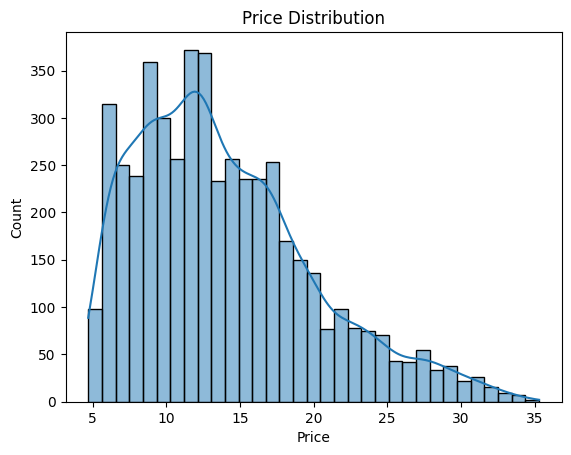

In [83]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.show()

In [ ]:
# Insights > Majority of the Price frequency lies 5 - 20 of the Prices 

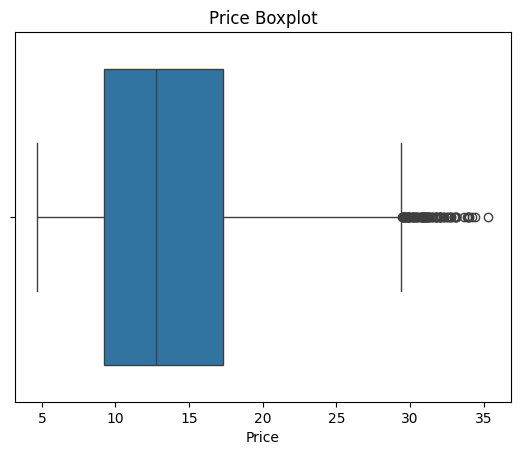

In [64]:
sns.boxplot(x = df['Price'])
plt.title("Price Boxplot")
plt.show()

In [ ]:
# Most of the Outliers lies in th 30-35 Range

In [70]:
df.head(5)

,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
0,11.02,11.00,11.07,10.91,85500.0,0.46,6,9,2019
1,10.97,11.04,11.14,10.86,95740.0,-0.36,5,9,2019
2,11.01,11.16,11.27,11.00,107620.0,-1.61,4,9,2019
3,11.19,11.20,11.40,11.08,106350.0,0.45,3,9,2019
4,11.14,11.20,11.30,11.05,58740.0,-0.62,30,8,2019


In [71]:
# Create a new 'Date' column by combining 'Day', 'Month', and 'Year'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])


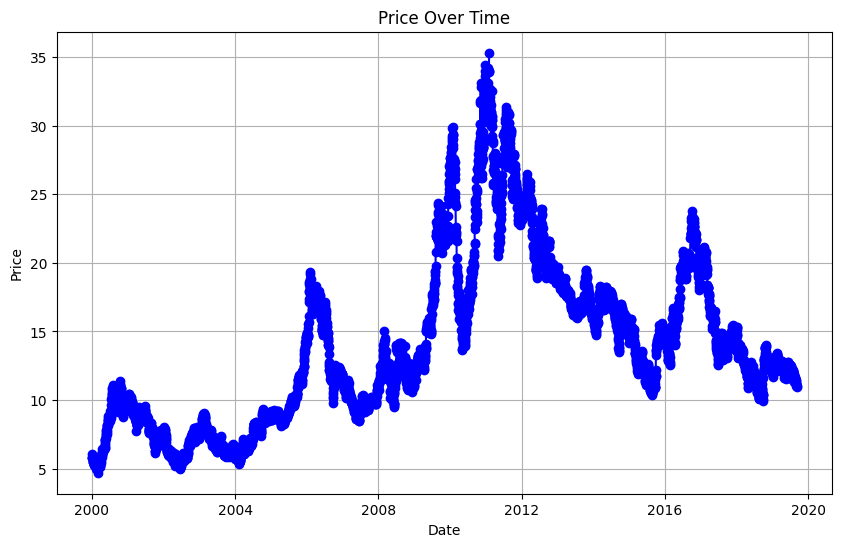

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', color='b')
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [78]:
# Group by 'Year' and calculate the mean price for each year
average_price_per_year = df.groupby('Year')['Price'].mean()

# Sort the average prices in descending order
sorted_average_price_per_year = average_price_per_year.sort_values(ascending=False)



In [79]:
sorted_average_price_per_year

Year
2011    27.092129
2010    22.276270
2012    21.577240
2016    18.196111
2009    17.830199
2013    17.474325
2014    16.335179
2017    15.780996
2006    14.631880
2015    13.117302
2019    12.275174
2018    12.242778
2008    12.099012
2005     9.988167
2007     9.892874
2001     8.361803
2000     8.180444
2004     7.400040
2003     6.955462
2002     6.420569
Name: Price, dtype: float64

In [ ]:
# Insights > In year 2011 the Prices were high 27.092129

Text(0, 0.5, 'Average Price per Year')

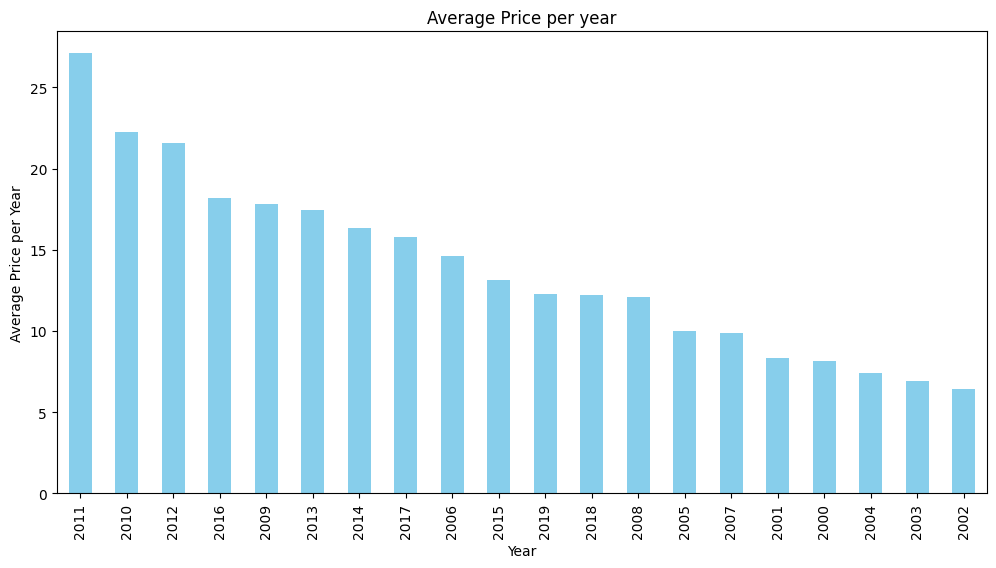

In [88]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,6))
sorted_average_price_per_year.plot(kind='bar', color='skyblue')
plt.title('Average Price per year')
plt.xlabel('Year')
plt.ylabel('Average Price per Year')


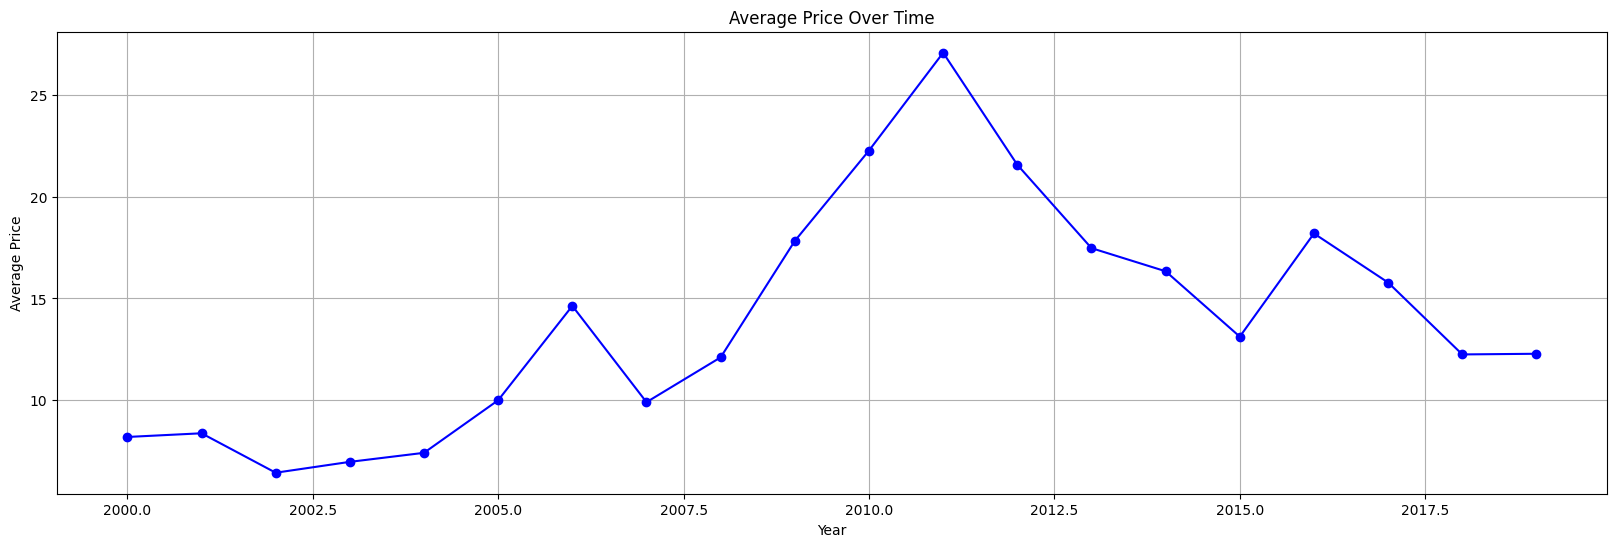

In [91]:
plt.figure(figsize=(20,6))
plt.plot(average_price_per_year.index, average_price_per_year, marker='o', linestyle='-', color='b')
plt.title('Average Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

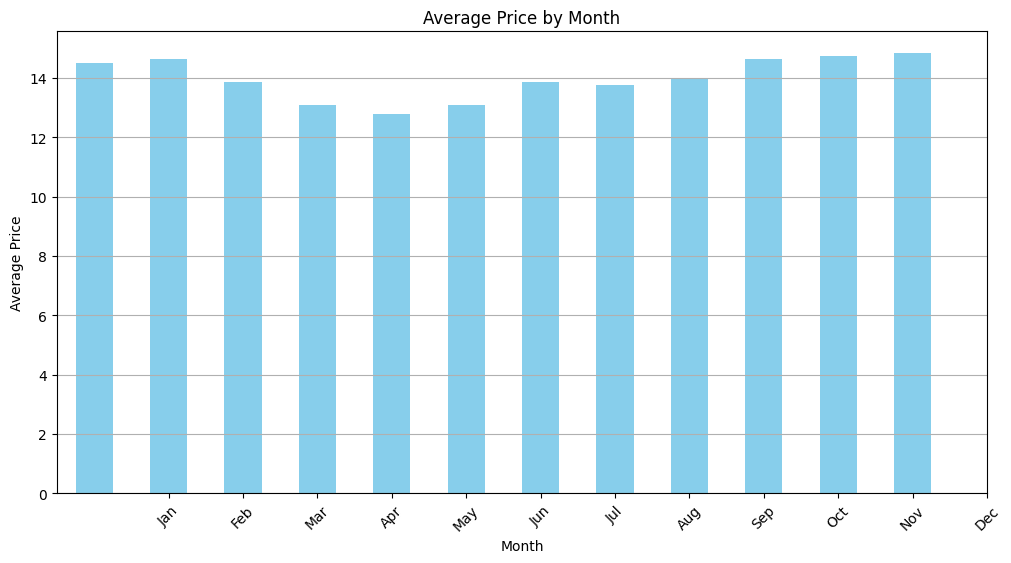

In [93]:
# Monthly Average Price
monthly_avg_price = df.groupby('Month')['Price'].mean()

plt.figure(figsize=(12, 6))
monthly_avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.show()


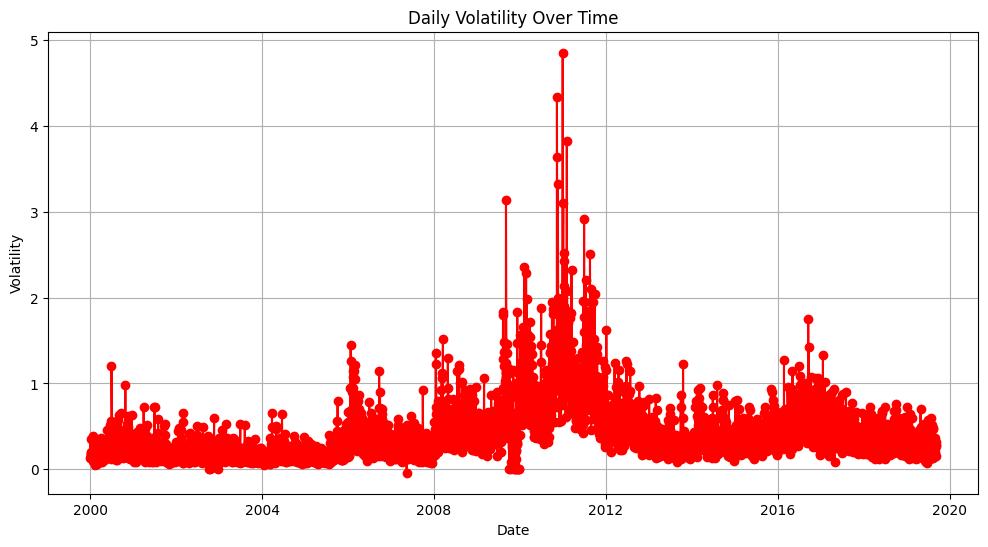

In [94]:
df['Volatility'] = df['High'] - df['Low']

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'], marker='o', linestyle='-', color='r')
plt.title('Daily Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


In [ ]:
#Insights >  There is a greater difference in data between the years 2011 and 2012 compared to the differences observed between other years.

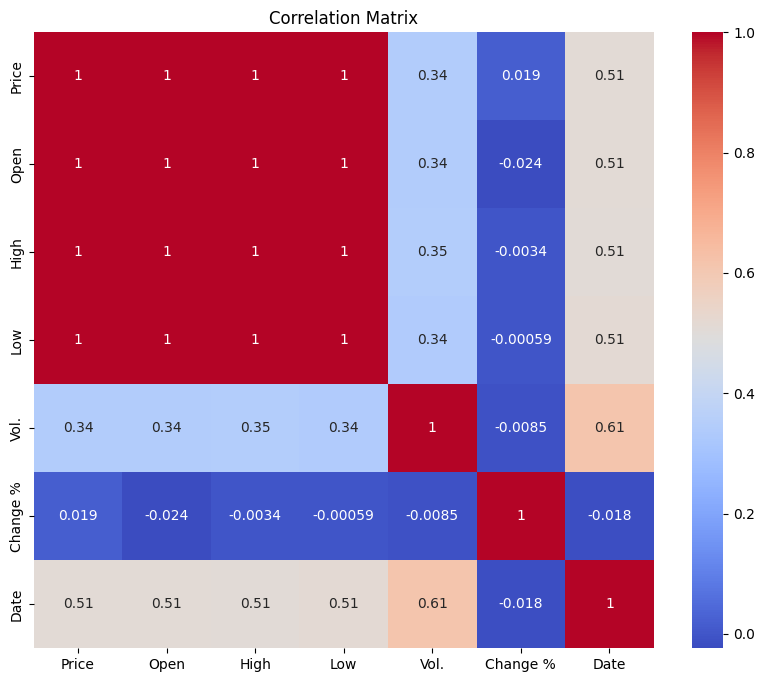

In [96]:
import seaborn as sns


correlation_matrix = df[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %','Date']].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# The  above heamap shows the correlation between the features of the given data 

In [99]:
df['Lag_1'] = df['Price'].shift(1)
df['Lag_2'] = df['Price'].shift(2)

In [103]:
!pip install statsmodels


DEPRECATION: Loading egg at c:\users\vinay\appdata\local\programs\python\python311\lib\site-packages\diamondpriceprediction-0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


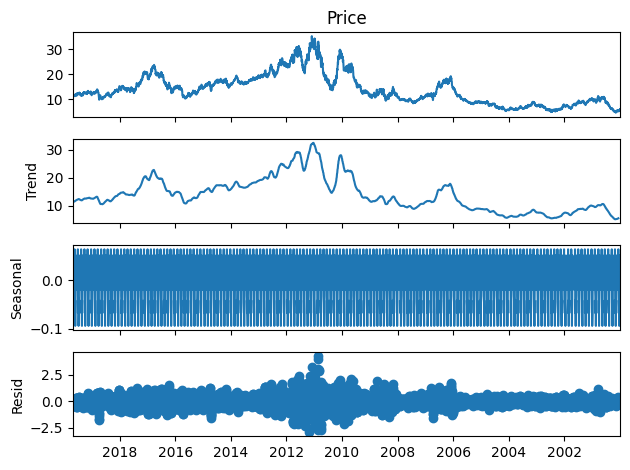

In [104]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'Date' is the index
df.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Price'], model='additive', period=30)  # Adjust period based on data frequency
decomposition.plot()
plt.show()


In [105]:
df.isnull().sum()

Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Day           0
Month         0
Year          0
Volatility    0
Price_Lag1    1
Lag_1         1
Lag_2         2
dtype: int64

In [107]:
df.dropna(inplace=True)

In [109]:
from sklearn.preprocessing import StandardScaler

features = ['Open', 'High', 'Low', 'Vol.', 'Change %', 'Day', 'Month', 'Year', 'Price_Lag1']
X = df[features]
y = df['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 1)

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 0.009352667608387955
R² Score: 0.9997222227519265


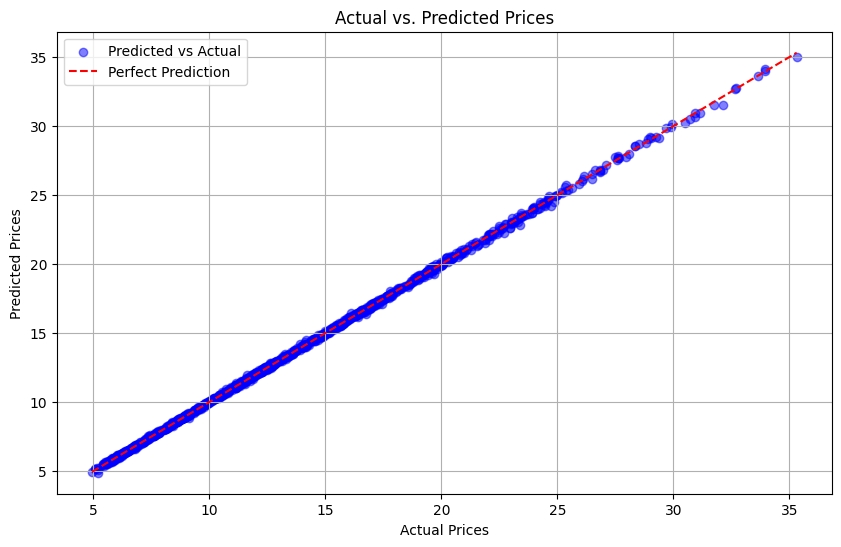

In [113]:
plt.figure(figsize=(10, 6))

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')

# Plot a diagonal line where predicted values equal actual values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Add titles and labels
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


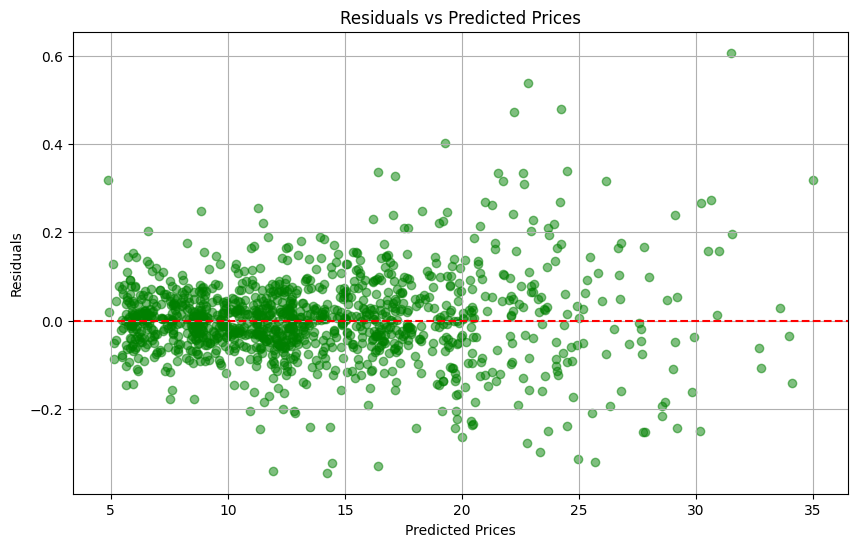

In [114]:
# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))

# Plot residuals
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In [39]:
import calendar

conversion_rate_usd_to_inr = 83.20

day_names = {i: calendar.day_name[i % 7] for i in range(7)}

df['Day'] = df['Day'].apply(lambda x: day_names.get(x % 7, 'Unknown'))

new_df = pd.DataFrame({
    'Product Name': 'Sugar',
    'Price': df['Price'],
    'Product Date': df['Day'].astype(str) + '/' + df['Month'].astype(str) + '/' + df['Year'].astype(str),
    'Day': df['Day'],
    'Final Price (INR)': df['Price'] * conversion_rate_usd_to_inr
})

new_df.to_excel('Output.xlsx', index=False, engine='openpyxl')



In [40]:
new_df.head()

,Product Name,Price,Product Date,Day,Final Price (INR)
0,Sugar,11.02,Sunday/9/2019,Sunday,916.864
1,Sugar,10.97,Saturday/9/2019,Saturday,912.704
2,Sugar,11.01,Friday/9/2019,Friday,916.032
3,Sugar,11.19,Thursday/9/2019,Thursday,931.008
4,Sugar,11.14,Wednesday/8/2019,Wednesday,926.848
